# qpoml first effort 

In [12]:
from qpoml import collection 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

scalar_context_path = '/mnt/c/Users/Research/Documents/GitHub/MAXI-J1535/final-push/data/pipeline/classification/input.csv'
qpo_path = '/mnt/c/Users/Research/Documents/GitHub/MAXI-J1535/final-push/data/pipeline/classification/output.csv'

context_preprocess_dict = {'A':'normalize', 'B':'normalize', 'C':'normalize', 'D':'normalize', 'E':'normalize', 'F':'normalize', 'G':'normalize'}
units = {'frequency':'Hz'}

In [13]:
collec = collection()
collec.load(qpo_csv=qpo_path, context_csv=scalar_context_path, qpo_preprocess=None, context_preprocess=context_preprocess_dict, approach='classification', units=units)
collec.evaluate(model=KNeighborsClassifier(), evaluation_approach='k-fold', folds=5)

In [14]:
print(collec.predictions[0])
print(collec.y_test[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1] [1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0
 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [

/home/yaroslav/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/home/yaroslav/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


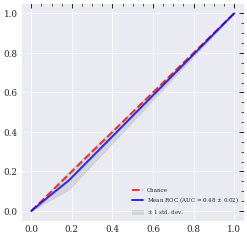

In [15]:
fig, ax = plt.subplots(figsize=(4,4))

from qpoml.plotting import plot_roc   
fpr, tpr, std_tpr, auc, std_auc = collec.roc_and_auc()

plot_roc(fpr, tpr, auc, std_auc, std_tpr, ax = ax)

plt.show()

# non qpoml first effort 

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression as logistic
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

scalar_context_path = '/mnt/c/Users/Research/Documents/GitHub/MAXI-J1535/final-push/data/pipeline/classification/input.csv'
qpo_path = '/mnt/c/Users/Research/Documents/GitHub/MAXI-J1535/final-push/data/pipeline/classification/output.csv'

In [17]:
input_df = pd.read_csv(scalar_context_path)
qpo_df = pd.read_csv(qpo_path)

merged_df = input_df.merge(qpo_df, on='observation_ID').sample(frac=1)

qpo_states = np.array(merged_df['qpo_state'])

X = merged_df.drop(columns=['observation_ID', 'qpo_state'])

X_train, X_test, y_train, y_test = train_test_split(X, qpo_states, test_size=0.25, stratify=qpo_states)

clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9558823529411765

In [18]:
len(qpo_states), len(np.where(qpo_states==1)[0])

(270, 82)

# second qpoml effort 
(after fix)

In [1]:
from qpoml import collection 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

scalar_context_path = '/mnt/c/Users/Research/Documents/GitHub/MAXI-J1535/final-push/data/pipeline/classification/input.csv'
qpo_path = '/mnt/c/Users/Research/Documents/GitHub/MAXI-J1535/final-push/data/pipeline/classification/output.csv'

context_preprocess_dict = {'A':'normalize', 'B':'normalize', 'C':'normalize', 'D':'normalize', 'E':'normalize', 'F':'normalize', 'G':'normalize'}
units = {'frequency':'Hz'}

[1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [

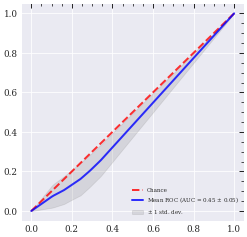

In [2]:
collec = collection()
collec.load(qpo_csv=qpo_path, context_csv=scalar_context_path, qpo_preprocess=None, context_preprocess=context_preprocess_dict, approach='classification', units=units)
collec.evaluate(model=RandomForestClassifier(), evaluation_approach='k-fold', folds=5, stratify=True)

print(collec.predictions[0])
print(collec.y_test[0])

fig, ax = plt.subplots(figsize=(4,4))

from qpoml.plotting import plot_roc   
fpr, tpr, std_tpr, auc, std_auc = collec.roc_and_auc()

plot_roc(fpr, tpr, auc, std_auc, std_tpr, ax = ax)

plt.show()

/mnt/c/Users/Research/Documents/GitHub/QPOML/qpoml/plotting.py:245: UserWarning: replace cmap!
  warnings.warn('replace cmap!')


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

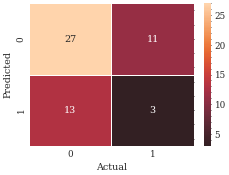

In [3]:
collec.plot_confusion_matrix()